# Churn Sight ©

## Predicting whether credit card customers will churn

<img src="https://www.goodfreephotos.com/albums/vector-images/credit-card-vector-graphics.png" width="50">
    
By **Data Sciencers**


In [1]:
# Imports
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

## Data Source
Data from https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data

From Kaggle: 
_A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is going to churn so they can proactively go to the customer, provide them better services, and turn customers' decisions in the opposite direction._

_Now, this dataset consists of over 10,000 customers. There are 18 features._

_We have only 16.07% of customers who have churned._

**NOTE**: some columns were renamed and last 2 were removed

## Data Exploration

In [2]:
df = pd.read_csv('bank_churn.csv')

- `Id`: Unique client identifier.
- `Customer_Age`: Age of the customer.
- `Gender`: Gender of the customer.
- `Dependent_Count`: Number of dependents of the customer.
- `Education_Level`: Educational level of the customer.
- `Marital_Status`: Marital status of the customer.
- `Income_Category`: Income category of the customer.
- `Card_Category`: Category of the credit card held by the customer.
- `Months_On_Book`: Number of months the customer has been a bank client.
- `Total_Relationship_Count`: Total number of bank products held by the customer.
- `Months_Inactive_12_Mon`: Number of months with inactivity in the last 12 months.
- `Contacts_Count_12_Mon`: Number of contacts with the bank in the last 12 months.
- `Credit_Limit`: Credit limit on the credit card.
- `Total_Revolving_Bal`: Total revolving balance on the credit card.
- `Avg_Open_To_Buy`: Average open to buy credit line on the credit card.
- `Total_Amt_Chng_Q4_Q1`: Change in transaction amount over the last four quarters.
- `Total_Trans_Amt`: Total transaction amount in the last 12 months.
- `Total_Trans_Ct`: Total transaction count in the last 12 months.
- `Total_Ct_Chng_Q4_Q1`: Change in transaction count over the last four quarters.
- `Avg_Utilization_Ratio`: Average utilization ratio of the credit card.
- `Attrition_Flag`: Indicates whether the customer's account is active or has churned.

In [3]:
# First 5 instances
df.head()

Id  Customer_Age Gender  Dependent_Count Education_Level  \
0  768805383            45      M                3     High School   
1  818770008            49      F                5        Graduate   
2  713982108            51      M                3        Graduate   
3  769911858            40      F                4     High School   
4  709106358            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_On_Book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  ...  Contacts_Count_12_Mon  Credit_Limit  \
0                         5  ...                      3       12691.0   
1                         6  ...                      2        8256.0   
2                         4  ...                      0        3418.0   
3                         3  ...                      1        3313.0   
4                         5  ...                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio     Attrition_Flag  
0                  0.061  Existing Customer  
1                  0.105  Existing Customer  
2                  0.000  Existing Customer  
3                  0.760  Existing Customer  
4                  0.000  Existing Customer  

[5 rows x 21 columns]

In [4]:
# Rows and columns
df.shape

(10127, 21)

In [5]:
# Checking null values
df.isnull().sum()

Id                          0
Customer_Age                0
Gender                      0
Dependent_Count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_On_Book              0
Total_Relationship_Count    0
Months_Inactive_12_Mon      0
Contacts_Count_12_Mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64

In [6]:
# Checking duplicates
df.duplicated().sum()

0

In [7]:
# Check distribution of target variable
df["Attrition_Flag"].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [8]:

# Select numerical columns
numerical_columns = df.drop(columns=["Id"]).select_dtypes(include=[np.number])

# Generate descriptive statistics
statistics = (numerical_columns.agg(
    ['mean', 'median', 'std', 'min', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]))
statistics.index = ['mean', 'median', 'std', 'min', 'max', 'Q1', 'Q3']

# Print the statistics
statistics.T

mean    median          std     min  \
Customer_Age                46.325960    46.000     8.016814    26.0   
Dependent_Count              2.346203     2.000     1.298908     0.0   
Months_On_Book              35.928409    36.000     7.986416    13.0   
Total_Relationship_Count     3.812580     4.000     1.554408     1.0   
Months_Inactive_12_Mon       2.341167     2.000     1.010622     0.0   
Contacts_Count_12_Mon        2.455317     2.000     1.106225     0.0   
Credit_Limit              8631.953698  4549.000  9088.776650  1438.3   
Total_Revolving_Bal       1162.814061  1276.000   814.987335     0.0   
Avg_Open_To_Buy           7469.139637  3474.000  9090.685324     3.0   
Total_Amt_Chng_Q4_Q1         0.759941     0.736     0.219207     0.0   
Total_Trans_Amt           4404.086304  3899.000  3397.129254   510.0   
Total_Trans_Ct              64.858695    67.000    23.472570    10.0   
Total_Ct_Chng_Q4_Q1          0.712222     0.702     0.238086     0.0   
Avg_Utilization_Ratio        0.274894     0.176     0.275691     0.0   

                                max        Q1         Q3  
Customer_Age                 73.000    41.000     52.000  
Dependent_Count               5.000     1.000      3.000  
Months_On_Book               56.000    31.000     40.000  
Total_Relationship_Count      6.000     3.000      5.000  
Months_Inactive_12_Mon        6.000     2.000      3.000  
Contacts_Count_12_Mon         6.000     2.000      3.000  
Credit_Limit              34516.000  2555.000  11067.500  
Total_Revolving_Bal        2517.000   359.000   1784.000  
Avg_Open_To_Buy           34516.000  1324.500   9859.000  
Total_Amt_Chng_Q4_Q1          3.397     0.631      0.859  
Total_Trans_Amt           18484.000  2155.500   4741.000  
Total_Trans_Ct              139.000    45.000     81.000  
Total_Ct_Chng_Q4_Q1           3.714     0.582      0.818  
Avg_Utilization_Ratio         0.999     0.023      0.503

In [9]:
# Create subplots: number of rows is half of the number of numeric columns
fig = sp.make_subplots(rows=int(len(numerical_columns.columns) / 2), cols=2, subplot_titles=numerical_columns.columns)

# Add histogram to subplots
for i, col in enumerate(numerical_columns.columns, start=1):
    fig.add_trace(
        go.Histogram(x=df[col], name=col),
        row=int((i + 1) / 2), col=((i + 1) % 2) + 1
    )

fig.update_layout(height=2000, width=800, title_text="Histograms of Numeric Features", showlegend=False)
fig.show()

In [10]:
# Check relationship between card utilization and churn status
fig = px.box(df, x='Attrition_Flag', y='Avg_Utilization_Ratio',
             color='Attrition_Flag',
             title='Credit Card Utilization and Churn Status',
             labels={'Attrition_Flag': 'Churn Status', 'Avg_Utilization_Ratio': 'Credit Card Utilization Ratio'})

fig.show()

In [11]:
# Relationship between numeric columns and churn status
# Select numeric columns
numeric_columns = numerical_columns.columns.tolist()

# Create subplots: number of rows is half of the number of numeric columns
fig = sp.make_subplots(rows=int(len(numeric_columns) / 2), cols=2, subplot_titles=numeric_columns)

# Add box plots to subplots
for i, col in enumerate(numeric_columns, start=1):
    fig.add_trace(
        go.Box(x=df["Attrition_Flag"], y=df[col], name=col),
        row=int((i + 1) / 2), col=((i + 1) % 2) + 1
    )

fig.update_layout(height=2000, width=800, title_text="Box Plots of Numeric Features", showlegend=False)
fig.show()

In [12]:
# Correlation matrix for numeric columns
corr = df[numeric_columns].corr()

fig = px.imshow(corr, text_auto=True)
fig.show()

In [13]:
# Correlation between columns and attrition flag
df_numeric = df[df.columns]
df_numeric["Attrition_Flag"] = df_numeric["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1})
numeric_columns = df_numeric.select_dtypes(include=[np.number])

correlation = numeric_columns.corr()

# Get correlation with 'Attrition_Flag'
attrition_corr = [correlation['Attrition_Flag']]
corrs = [[x for x in attrition_corr[0]][1:-1]]

# Create heatmap using plotly
fig = px.imshow(corrs, x=numeric_columns.columns.tolist()[1:-1], zmin=-0.4, zmax=0.4)
fig.show()

Interesting!

There's a high correlation between total revolving balance, total transaction count, and whether they're attrited!

## Data Preprocessing

*Target Data*:
- Remove rows with `null` values
- Convert `Attrition Flag` and `Gender` to binary
- Convert `Education_Level` to numeric and drop rows with `Unknown`
- One Hot Encode `Marital_Status` and remove `Unknown` column
- Convert `Card_Category` to numeric
- Use KNN to impute `Unknown` Values for `Income_Category`

Drop rows with `null` values and convert `Attrition_Flag` and `Gender` values to binary

In [14]:
df = df.dropna()
df['Attrition_Flag'] = df['Attrition_Flag'].map({"Existing Customer": 0, "Attrited Customer": 1})
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

Convert `Education_Level` to numeric and drop rows with `Unknown`

In [15]:
education_mapping = {'Unknown': np.nan, 'Uneducated': 0, 'High School': 1, 'College': 2, 'Graduate': 3,
                     'Post-Graduate': 4, 'Doctorate': 5}

df['Education_Level'] = df['Education_Level'].map(education_mapping)

df = df.dropna(subset=["Education_Level"])

One hot encode marital status and get rid of unknown values

In [16]:
df = pd.get_dummies(df, columns=['Marital_Status'], dtype=int)
df = df.drop(columns=["Marital_Status_Unknown"])


Convert income category to numbers and unknown to `NA`

In [17]:
income_mapping = {'Unknown': np.nan, 'Less than $40K': 0, '$40K - $60K': 1, '$80K - $120K': 2, '$60K - $80K': 3,
                  '$120K +': 4}

df['Income_Category'] = df['Income_Category'].replace(income_mapping)

/var/folders/ns/d3pngcvj64gbpfwcf3hbynqm0000gn/T/ipykernel_80070/1706421031.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Convert card category to numbers

In [18]:
card_mapping = {'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3}

df['Card_Category'] = df['Card_Category'].replace(card_mapping)

/var/folders/ns/d3pngcvj64gbpfwcf3hbynqm0000gn/T/ipykernel_80070/2869693678.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Remove customer IDs

In [19]:
df = df[df.columns[1:]]

Use KNN to impute null values for Income Category

In [20]:
imputer = KNNImputer(n_neighbors=4)
df_imputed = imputer.fit_transform(df)
df = pd.DataFrame(df_imputed, columns=df.columns)

## Data Modeling

### Training before Feature Selection

In [21]:
X, y = df[[c for c in df if c not in ['Attrition_Flag']]], df['Attrition_Flag']

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from pprint import pprint

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

models = [RandomForestClassifier(), RandomForestClassifier(max_depth=3)
    , RandomForestClassifier(max_depth=3, min_samples_split=8),
          GradientBoostingClassifier(), GradientBoostingClassifier(min_samples_split=4),
          GradientBoostingClassifier(min_samples_split=8),
          KNeighborsClassifier(n_neighbors=3),
          KNeighborsClassifier(), KNeighborsClassifier(n_neighbors=7), LogisticRegression(max_iter=100000)]

CV_scores = {}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

for i in range(len(models)):
    model = models[i]
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    CV_scores[type(model).__name__ + str(i)] = np.mean(scores)

print("CV Score BEFORE Feature Selection")
pprint(CV_scores)

CV Score BEFORE Feature Selection
{'GradientBoostingClassifier3': 0.9660189607452659,
 'GradientBoostingClassifier4': 0.9661638876700305,
 'GradientBoostingClassifier5': 0.9660200155263778,
 'KNeighborsClassifier6': 0.8890511611030479,
 'KNeighborsClassifier7': 0.8944240051304553,
 'KNeighborsClassifier8': 0.8909396412056569,
 'LogisticRegression9': 0.8960232642522022,
 'RandomForestClassifier0': 0.9593394538765315,
 'RandomForestClassifier1': 0.8913742110237284,
 'RandomForestClassifier2': 0.8942797110743579}


#### Feature selection + Splitting Data + Train/Validate

In [33]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

selector = SelectKBest(chi2, k=15)
X_new = selector.fit_transform(X, y)  # !! select 15/21 features
X_train_FS, X_test_FS, y_train_FS, y_test_FS = train_test_split(X_new, y, test_size=0.2, random_state=1)

In [34]:
CV_scores_FS = {}

models_FS = [RandomForestClassifier(), RandomForestClassifier(max_depth=3)
    , RandomForestClassifier(max_depth=3, min_samples_split=8),
             GradientBoostingClassifier(), GradientBoostingClassifier(min_samples_split=4),
             GradientBoostingClassifier(min_samples_split=8),
             KNeighborsClassifier(n_neighbors=3),
             KNeighborsClassifier(), KNeighborsClassifier(n_neighbors=7), LogisticRegression(max_iter=100000)]

for i in range(len(models_FS)):
    model = models[i]
    scores = cross_val_score(model, X_train_FS, y_train_FS, cv=10, scoring='accuracy')
    CV_scores_FS[type(model).__name__ + str(i)] = np.mean(scores)

print("\nCV Score AFTER Feature Selection")
pprint(CV_scores_FS)


CV Score AFTER Feature Selection
{'GradientBoostingClassifier3': 0.9663090255510177,
 'GradientBoostingClassifier4': 0.9655831251898606,
 'GradientBoostingClassifier5': 0.9665990903567693,
 'KNeighborsClassifier6': 0.8890511611030479,
 'KNeighborsClassifier7': 0.8944240051304553,
 'KNeighborsClassifier8': 0.8909396412056569,
 'LogisticRegression9': 0.8883256826543355,
 'RandomForestClassifier0': 0.9613732828163499,
 'RandomForestClassifier1': 0.8970371198568874,
 'RandomForestClassifier2': 0.8951486397542782}


#### Comparing Cross Validation Scores

In [35]:
#identify best model based on CV
from pprint import pprint

print("CV Score BEFORE Feature Seelction")
pprint(CV_scores)
print("\n CV Score AFTER Feature Selection")
pprint(CV_scores_FS)

CV Score BEFORE Feature Seelction
{'GradientBoostingClassifier3': 0.9660189607452659,
 'GradientBoostingClassifier4': 0.9661638876700305,
 'GradientBoostingClassifier5': 0.9660200155263778,
 'KNeighborsClassifier6': 0.8890511611030479,
 'KNeighborsClassifier7': 0.8944240051304553,
 'KNeighborsClassifier8': 0.8909396412056569,
 'LogisticRegression9': 0.8960232642522022,
 'RandomForestClassifier0': 0.9593394538765315,
 'RandomForestClassifier1': 0.8913742110237284,
 'RandomForestClassifier2': 0.8942797110743579}

 CV Score AFTER Feature Selection
{'GradientBoostingClassifier3': 0.9663090255510177,
 'GradientBoostingClassifier4': 0.9655831251898606,
 'GradientBoostingClassifier5': 0.9665990903567693,
 'KNeighborsClassifier6': 0.8890511611030479,
 'KNeighborsClassifier7': 0.8944240051304553,
 'KNeighborsClassifier8': 0.8909396412056569,
 'LogisticRegression9': 0.8883256826543355,
 'RandomForestClassifier0': 0.9613732828163499,
 'RandomForestClassifier1': 0.8970371198568874,
 'RandomForestC

The best model using 10-fold cross-validation was: INSERT HERE 

#### Testing Accuracy

In [36]:
from sklearn.metrics import accuracy_score

print("Testing data, Before Feature Selection")
testing = {}
for i in range(len(models)):
    model = models[i]
    fitted = model.fit(X_train, y_train)
    testing[type(model).__name__ + str(i)] = accuracy_score(y_test, fitted.predict(X_test))

print("Testing data, After Feature Selection")
testing_FS = {}
for i in range(len(models_FS)):
    model = models_FS[i]
    fitted = model.fit(X_train_FS, y_train_FS)
    testing_FS[type(model).__name__ + str(i)] = accuracy_score(y_test_FS, fitted.predict(X_test_FS))

Testing data, Before Feature Selection
Testing data, After Feature Selection


In [37]:
print("Testing data accuracy, Before Feature Selection ")
pprint(testing)
print("\n Testing data accuracy, After Feature Selection")
pprint(testing_FS)

Testing data accuracy, Before Feature Selection 
{'GradientBoostingClassifier3': 0.9605110336817654,
 'GradientBoostingClassifier4': 0.9605110336817654,
 'GradientBoostingClassifier5': 0.9616724738675958,
 'KNeighborsClassifier6': 0.8809523809523809,
 'KNeighborsClassifier7': 0.8792102206736353,
 'KNeighborsClassifier8': 0.8815331010452961,
 'LogisticRegression9': 0.8681765389082462,
 'RandomForestClassifier0': 0.9518002322880371,
 'RandomForestClassifier1': 0.8855981416957027,
 'RandomForestClassifier2': 0.8792102206736353}

 Testing data accuracy, After Feature Selection
{'GradientBoostingClassifier3': 0.9605110336817654,
 'GradientBoostingClassifier4': 0.9599303135888502,
 'GradientBoostingClassifier5': 0.9605110336817654,
 'KNeighborsClassifier6': 0.8809523809523809,
 'KNeighborsClassifier7': 0.8792102206736353,
 'KNeighborsClassifier8': 0.8815331010452961,
 'LogisticRegression9': 0.8722415795586528,
 'RandomForestClassifier0': 0.9547038327526133,
 'RandomForestClassifier1': 0.8896

#### Extract + Plot Feature Importances

### change index of the random forest/XGBoost model you graph based on which you decide is the best !! 

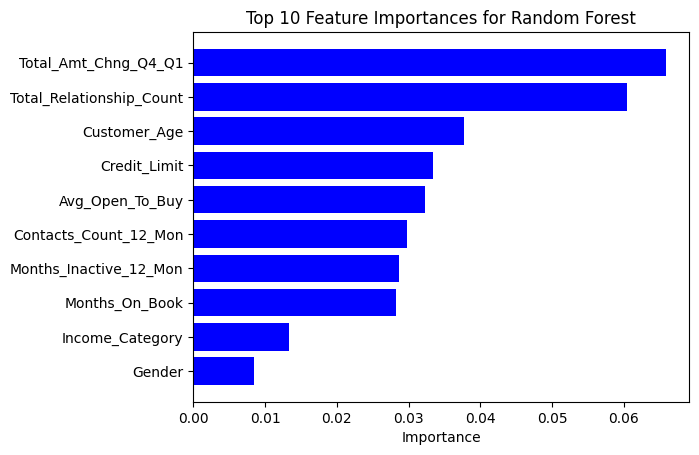

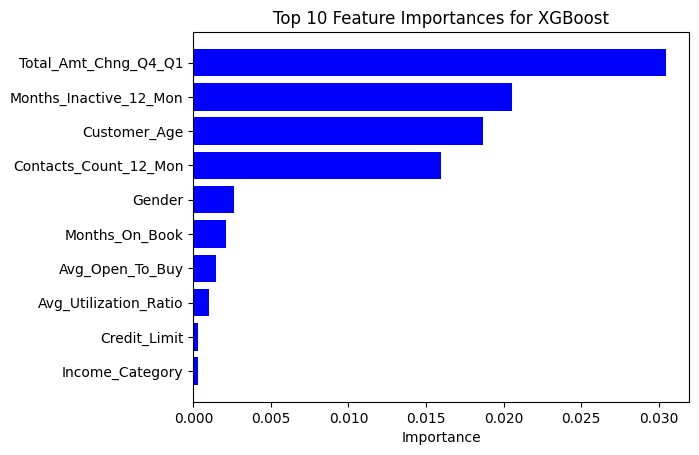

In [38]:
import matplotlib.pyplot as plt

importanceModels = {'Random Forest': models_FS[0], 'XGBoost': models_FS[5]}  #CHANGE INDEX BASED ON 
features = selector.get_feature_names_out()

for k, v in importanceModels.items():
    importances = v.feature_importances_
    indices = np.argsort(importances)[0:10]
    plt.title('Top 10 Feature Importances for ' + k)
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Importance')
    plt.show()

## Data Interpretation
Here

## Data Action
Here